Regression Equation: y = 69.333*x^2 + -173.333*x + 104.000
[13, 0, 0]
[0.05416666666666667, 0.0, 0.0]
Slopes: [-52.0, 0.0]
Average slope: -26.0
Difference from g: 35.81
The average slope differs significantly from the value of g.


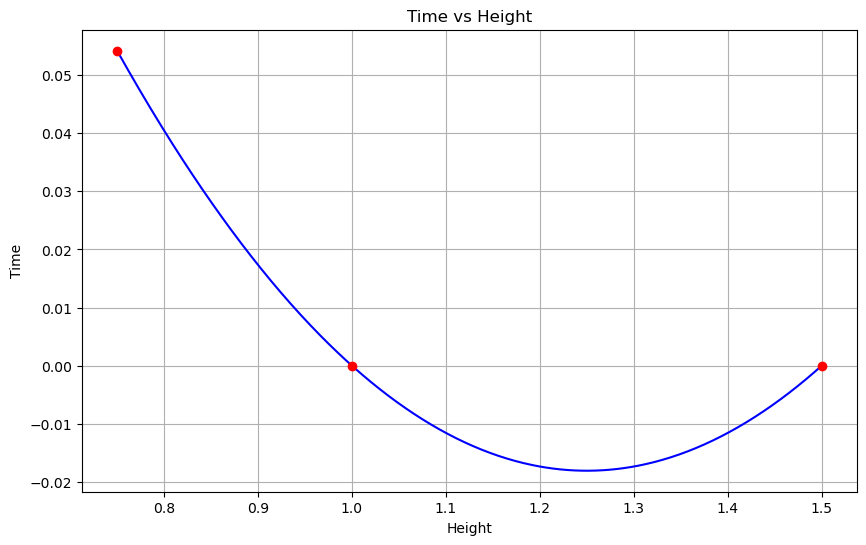

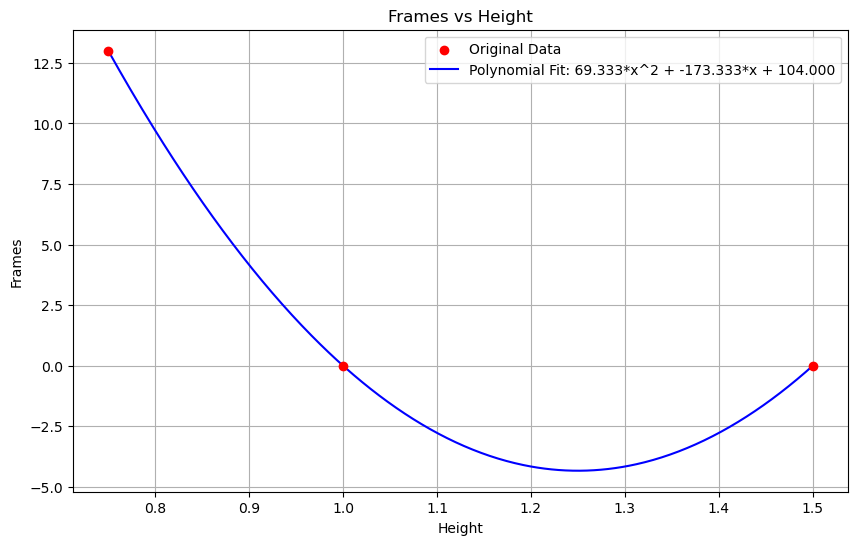

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the folder and height datapoints
video_folder = "final"
heights = [0.75, 1.00, 1.50]  # Replace with your height values

# Initialize lists to store total frame counts and corresponding heights
frame_numbers = []

# Loop through videos and process them
for i, height in enumerate(heights):
    video_path = os.path.join(video_folder, f"{i+1}.mp4")  # Assuming videos are named 1.mp4, 2.mp4, etc.
    cap = cv2.VideoCapture(video_path)
    
    # Calculate total frame count for the video
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_numbers.append(frame_count)
    
    cap.release()

# Curve fitting: Fit a polynomial of degree 2
degree = 2
coefficients = np.polyfit(heights, frame_numbers, degree)
polynomial = np.poly1d(coefficients)

# Generate smooth curve points
fitted_heights = np.linspace(min(heights), max(heights), 500)
fitted_frames = polynomial(fitted_heights)

# Display the regression equation
equation = " + ".join([f"{coeff:.3f}*x^{degree-i}" for i, coeff in enumerate(coefficients)])
equation = equation.replace("*x^0", "").replace("x^1", "x").strip(" + ")
print(f"Regression Equation: y = {equation}")
print(frame_numbers)

time=[]
for i in frame_numbers:
    time.append(i*1/240)
    
print(time)

slopes = []
for i in range(0, len(frame_numbers) - 1):
    slopes.append((frame_numbers[i+1] - frame_numbers[i]) / (heights[i+1] - heights[i]))

# Print slopes and average slope

print("Slopes:", slopes)
average_slope = sum(slopes) / len(slopes)
print("Average slope:", average_slope)

# Check how close the average slope is to the gravitational constant (g ≈ 9.81)
g_value = 9.81  # Gravitational acceleration in m/s²
difference_from_g = abs(average_slope - g_value)
print(f"Difference from g: {difference_from_g:.2f}")

# Optionally, you could check if the difference is within an acceptable range (tolerance)
tolerance = 0.5 
if difference_from_g <= tolerance:
    print(f"The average slope is close to the value of g (with tolerance of {tolerance}).")
else:
    print(f"The average slope differs significantly from the value of g.")


# Calculate time for the fitted heights based on the fitted frame numbers
fitted_frames = polynomial(fitted_heights)  # Fitted frame numbers
fitted_time = fitted_frames * (1 / 240)  # Time for the fitted heights

# Plotting time vs height
plt.figure(figsize=(10, 6))
plt.scatter(heights, time, color="red", label="Original Data", zorder=5)
plt.plot(fitted_heights, fitted_time, color="blue", label=f"Polynomial Fit: {equation}", zorder=4)
plt.title("Time vs Height")
plt.xlabel("Height")
plt.ylabel("Time")
plt.grid(True)

# Plotting frames vs height with fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(heights, frame_numbers, color="red", label="Original Data", zorder=5)
plt.plot(fitted_heights, fitted_frames, color="blue", label=f"Polynomial Fit: {equation}", zorder=4)
plt.title("Frames vs Height")
plt.xlabel("Height")
plt.ylabel("Frames")
plt.grid(True)
plt.legend()
plt.show()
